In [1]:
import pandas as pd
import numpy as np
rec_data = pd.read_csv('rec_df.csv')

In [2]:
# Load Surprise libraries
from surprise import KNNBasic
from surprise import Reader
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import cross_validate

In [3]:
# Well I'm not sure if this is the best way, but there are so few above 5 I think I can group them all together
rec_data['rating'] = rec_data['count'].apply(lambda x: 5 if (x >= 5) else x)

In [4]:
rec_data

,Unnamed: 0,user_id,product_id,count,rating
0,0,1,196,11,5
1,1,1,12427,10,5
2,2,1,10258,10,5
3,3,1,25133,9,5
4,4,1,13032,4,4
...,...,...,...,...,...
13863741,13863741,206209,23909,1,1
13863742,13863742,206209,48697,1,1
13863743,13863743,206209,755,1,1
13863744,13863744,206209,6825,1,1


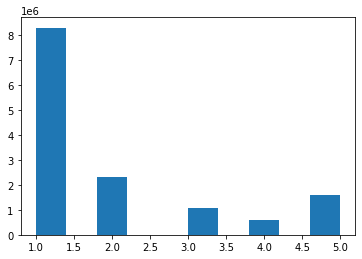

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.hist(rec_data['rating']);

In [6]:
new_rec_data = rec_data.drop(columns='count')
new_rec_data.tail()


,Unnamed: 0,user_id,product_id,rating
13863741,13863741,206209,23909,1
13863742,13863742,206209,48697,1
13863743,13863743,206209,755,1
13863744,13863744,206209,6825,1
13863745,13863745,206209,42606,1


In [7]:
new_rec_data =  new_rec_data.drop(columns='Unnamed: 0')

In [8]:
new_rec_data

,user_id,product_id,rating
0,1,196,5
1,1,12427,5
2,1,10258,5
3,1,25133,5
4,1,13032,4
...,...,...,...
13863741,206209,23909,1
13863742,206209,48697,1
13863743,206209,755,1
13863744,206209,6825,1


In [13]:
rec_data_products = pd.merge(new_rec_data,products_Desc, on="product_id")

In [14]:
rec_data_products= rec_data_products.drop(columns='Unnamed: 0')

In [15]:
rec_data_products.to_csv('ratings_products.csv')

In [16]:
rec_data_products.head()

,user_id,product_id,rating,product_name,aisle_id,department_id,aisle,department,metadata,vector_data
0,1,196,5,Soda,77,7,soft drinks,beverages,soft drinks beverages Soda,soft drinks beverages Soda
1,15,196,5,Soda,77,7,soft drinks,beverages,soft drinks beverages Soda,soft drinks beverages Soda
2,19,196,3,Soda,77,7,soft drinks,beverages,soft drinks beverages Soda,soft drinks beverages Soda
3,21,196,1,Soda,77,7,soft drinks,beverages,soft drinks beverages Soda,soft drinks beverages Soda
4,31,196,2,Soda,77,7,soft drinks,beverages,soft drinks beverages Soda,soft drinks beverages Soda


In [12]:
products_Desc =  pd.read_csv('products_Description.csv')

In [17]:
import time
from surprise import NormalPredictor
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate
from surprise import SVD
from surprise import KNNBaseline
from surprise import KNNBasic
from surprise.model_selection import train_test_split
from surprise.prediction_algorithms import knns
from surprise.similarities import cosine, msd, pearson
from surprise.prediction_algorithms import SVD, SVDpp
from surprise.model_selection import GridSearchCV
from surprise import accuracy
from surprise.model_selection import train_test_split
tic = time.time()
reader = Reader(rating_scale=(1, 5))
readtime = time.time()-tic
print(readtime)
toc = time.time()
new_rec_data = Dataset.load_from_df(rec_data_products[['user_id', 'product_id', 'rating']], reader)
loadtime = time.time()-toc
print(loadtime)
tac = time.time()
new_trainset, new_testset = train_test_split(new_rec_data, test_size=.25, random_state=12)
splittime = time.time()-tac
print(splittime)

0.0
13.687053918838501
44.72295045852661


In [18]:
new_trainset

In [19]:
n_epochs= [10, 20, 30, 40, 50, 100]
lr_all= [0.001, 0.002 ]
offset=0.4
reg_all= [0.02, 0.08]

In [20]:
# Might as well start with the best params from the last model
mse = []
combinations = []
for i in n_epochs:
    for p in lr_all:
        for q in reg_all:        
            tic = time.time()
            new_svd_algo = SVD(n_epochs = i, lr_all = p, reg_all = q)
            new_svd_algo.fit(new_trainset)
            combinations.append([i,p,q])
            fit_time = time.time()-tic
            print('fit ', fit_time)
            toc = time.time()
            new_predictions = new_svd_algo.test(new_testset)
            pred_time = time.time()-toc
            print('pred ', pred_time)
# Then compute RMSE
            
            mserr = accuracy.rmse(new_predictions)
            mse.append(mserr)
            print("n_epochs:", i , " lrl_all :", p ,"reg_all: ",  q, "RMSE: ", mse)
print("Best parameters using Grid Search CV",  combinations[score_precisionatk.index(min(mse))])
            


fit  260.4629068374634
pred  64.54589295387268
RMSE: 1.2722
n_epochs: 10  lrl_all : 0.001 reg_all:  0.02 RMSE:  [1.2721618371840882]
fit  260.3425555229187
pred  100.47479891777039
RMSE: 1.2725
n_epochs: 10  lrl_all : 0.001 reg_all:  0.08 RMSE:  [1.2721618371840882, 1.2724597304015433]
fit  268.0165295600891
pred  84.02346873283386
RMSE: 1.2602
n_epochs: 10  lrl_all : 0.002 reg_all:  0.02 RMSE:  [1.2721618371840882, 1.2724597304015433, 1.2601811862276355]
fit  274.9659905433655
pred  104.15642404556274
RMSE: 1.2609
n_epochs: 10  lrl_all : 0.002 reg_all:  0.08 RMSE:  [1.2721618371840882, 1.2724597304015433, 1.2601811862276355, 1.2609309819642776]
fit  549.4786987304688
pred  100.58359551429749
RMSE: 1.2554
n_epochs: 20  lrl_all : 0.001 reg_all:  0.02 RMSE:  [1.2721618371840882, 1.2724597304015433, 1.2601811862276355, 1.2609309819642776, 1.2553822909748709]
fit  560.5407524108887
pred  127.9777946472168
RMSE: 1.2560
n_epochs: 20  lrl_all : 0.001 reg_all:  0.08 RMSE:  [1.2721618371840882,

NameError: name 'score_precisionatk' is not defined

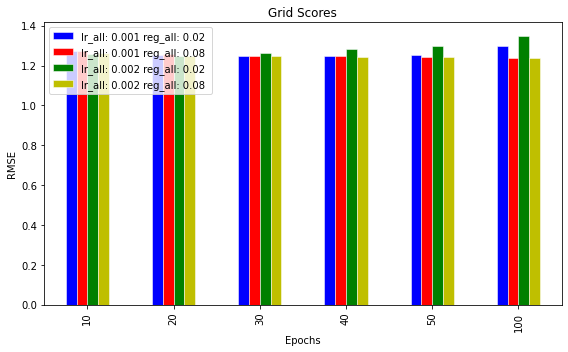

In [3]:
import numpy as np
import matplotlib.pyplot as plt  
import pandas as pd
from itertools import cycle, islice
N = 6
ind = np.arange(N) 
width = 0.25
#plt.figure(figsize=(15, 8))
list1= [1.2722,1.2554, 1.2470, 1.2459, 1.2509,1.2996]
list2= [1.2725,1.2560,1.2493, 1.2458, 1.2438, 1.2370]
list3= [1.2602, 1.2491, 1.2616, 1.2820, 1.3001,1.3491]
list4= [1.2609,1.2503,1.2465, 1.2436, 1.2410,1.2393]
plt.rcParams["figure.figsize"] = [8, 5]
plt.rcParams["figure.autolayout"] = True
d = {'lr_all: 0.001 reg_all: 0.02 ': list1,
      'lr_all: 0.001 reg_all: 0.08': list2, 'lr_all: 0.002 reg_all: 0.02':list3, 'lr_all: 0.002 reg_all: 0.08': list4}
df = pd.DataFrame(d)
my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(df)))

df.plot(kind='bar', edgecolor='white',width = 0.5 ,linewidth=0.5,color=my_colors)
plt.legend(loc="upper left")
plt.xlabel("Epochs")
plt.ylabel('RMSE')
plt.xticks(ind,['10', '20', '30','40','50','100'])
plt.title("Grid Scores")
plt.show()

In [22]:
print("Best parameters using Grid Search CV",  combinations[mse.index(min(mse))], min(mse))

Best parameters using Grid Search CV [100, 0.001, 0.08] 1.2369590300385571


In [23]:
tic = time.time()
best_fit = SVD(n_epochs = 100, lr_all = 0.001, reg_all = 0.08)
best_fit.fit(new_trainset)
fit_time = time.time()-tic
print('fit ', fit_time)
toc = time.time()
new_predictions = best_fit.test(new_testset)
pred_time = time.time()-toc
print('pred ', pred_time)
accuracy.rmse(new_predictions)

fit  4603.207727432251
pred  415.1503098011017
RMSE: 1.2367


In [30]:
def get_recommendations(userid):
    # get the list of the product ids
    unique_ids = rec_data_products['product_id'].unique()
    print('total products:', len(unique_ids))
    ids = rec_data_products.loc[rec_data_products['user_id']== userid, 'product_id']
    print('user : ', userid, 'rated' , len(ids) , 'number of products')
    # remove the rated movies for the recommendations
    products_to_predict = np.setdiff1d(unique_ids,ids)
    return products_to_predict

In [31]:
products_to_predict = get_recommendations(48551)
print(len(products_to_predict))


total products: 49685
user :  48551 rated 151 number of products
49534


In [34]:
products_to_predict

array([    1,     2,     3, ..., 49686, 49687, 49688], dtype=int64)

In [49]:
my_recs = []
for iid in products_to_predict:
    my_recs.append((iid, best_fit.predict(48551,iid).est))

df_result = pd.DataFrame(my_recs, columns=['product_id', 'predictions']).sort_values('predictions', ascending=False)


In [50]:
df_recs = pd.merge(df_result,products_Desc, on="product_id")

In [61]:
df_recs

,product_id,predictions,Unnamed: 0,product_name,aisle_id,department_id,aisle,department,metadata,vector_data
0,17469,3.072820,17468,Lo-Carb Energy Drink,64,7,energy sports drinks,beverages,energy sports drinks beverages Lo-Carb Energy ...,energy sports drinks beverages Lo-Carb Energy ...
1,47231,2.834695,47230,Ultra-Purified Water,115,7,water seltzer sparkling water,beverages,water seltzer sparkling water beverages Ultra-...,water seltzer sparkling water beverages Ultra-...
2,19660,2.832166,19659,Spring Water,115,7,water seltzer sparkling water,beverages,water seltzer sparkling water beverages Spring...,water seltzer sparkling water beverages Spring...
3,48041,2.830864,48040,DanActive Vanilla Probiotic Dairy Drink,120,16,yogurt,dairy eggs,yogurt dairy eggs DanActive Vanilla Probiotic ...,yogurt dairy eggs DanActive Vanilla Probiotic ...
4,9292,2.828631,9291,Half And Half Ultra Pasteurized,84,16,milk,dairy eggs,milk dairy eggs Half And Half Ultra Pasteurized,milk dairy eggs Half And Half Ultra Pasteurized
...,...,...,...,...,...,...,...,...,...,...
49529,13878,1.288207,13877,Daily Grind Black Peppercorn,104,13,spices seasonings,pantry,spices seasonings pantry Daily Grind Black Pep...,spices seasonings pantry Daily Grind Black Pep...
49530,14626,1.278443,14625,Organic Cherry/Watermelon Fruity Hearts Treat ...,6,2,other,other,other other Organic Cherry/Watermelon Fruity H...,other other Organic Cherry/Watermelon Fruity H...
49531,19423,1.276199,19422,Nature's Colors Decorating Set,104,13,spices seasonings,pantry,spices seasonings pantry Nature's Colors Decor...,spices seasonings pantry Nature's Colors Decor...
49532,13373,1.258225,13372,Food Coloring,97,13,baking supplies decor,pantry,baking supplies decor pantry Food Coloring,baking supplies decor pantry Food Coloring


In [52]:
df_recs_per_aisle = df_recs.groupby('aisle').first()

In [56]:
df_recs_per_aisle

,product_id,predictions,Unnamed: 0,product_name,aisle_id,department_id,department,metadata,vector_data
aisle,,,,,,,,,
air fresheners candles,35662,2.177977,35661,Citrus Blend Air Freshener,101,17,household,air fresheners candles household Citrus Blend ...,air fresheners candles household Citrus Blend ...
asian foods,43452,2.343860,43451,Japanese Style Noodles & Chicken Flavored Sauce,66,6,international,asian foods international Japanese Style Noodl...,asian foods international Japanese Style Noodl...
baby accessories,10797,2.450689,10796,Nurser Liners,82,18,babies,baby accessories babies Nurser Liners,baby accessories babies Nurser Liners
baby bath body care,21549,2.127956,21548,No More Tangles Baby Shampoo & Conditioning,102,18,babies,baby bath body care babies No More Tangles Bab...,baby bath body care babies No More Tangles Bab...
baby food formula,41517,2.589969,41516,Sidekicks Chocolate Shake,92,18,babies,baby food formula babies Sidekicks Chocolate S...,baby food formula babies Sidekicks Chocolate S...
...,...,...,...,...,...,...,...,...,...
trash bags liners,40582,1.960823,40581,Ultra Flex Drawstring 39 Gallon Bags,60,17,household,trash bags liners household Ultra Flex Drawstr...,trash bags liners household Ultra Flex Drawstr...
vitamins supplements,15708,2.447931,15707,Lime Tangerine Yerba Mate Shot,47,11,personal care,vitamins supplements personal care Lime Tanger...,vitamins supplements personal care Lime Tanger...
water seltzer sparkling water,47231,2.834695,47230,Ultra-Purified Water,115,7,beverages,water seltzer sparkling water beverages Ultra-...,water seltzer sparkling water beverages Ultra-...


In [59]:
df_recs_per_aisle_new =  pd.DataFrame(df_recs_per_aisle, columns=['product_id','product_name' ,'predictions']).sort_values('predictions', ascending=False)

In [60]:
df_recs_per_aisle_new

,product_id,product_name,predictions
aisle,,,
energy sports drinks,17469,Lo-Carb Energy Drink,3.072820
water seltzer sparkling water,47231,Ultra-Purified Water,2.834695
yogurt,48041,DanActive Vanilla Probiotic Dairy Drink,2.830864
milk,9292,Half And Half Ultra Pasteurized,2.828631
soft drinks,196,Soda,2.802088
...,...,...,...
shave needs,21818,Anti-Bumps Shave Gel for Bikini Area,2.046765
skin care,13705,Yoga Bath Soak,2.046541
deodorants,11593,Extra Extra Dry Regular Solid Antiperspirant D...,2.046108


In [44]:
userratedproducts= rec_data_products[rec_data_products["user_id"] == 48551]

In [47]:
userratedproducts = pd.DataFrame(userratedproducts, columns=['product_id', 'product_name', 'rating']).sort_values('rating', ascending=False).head(40)


In [48]:
userratedproducts

,product_id,product_name,rating
6571212,34429,Kumato Tomatoes,5
2501895,13083,Lowfat Small Curd Cottage Cheese,5
2587986,43014,Sliced Baby Bella Mushrooms,5
8337225,13292,"Juice Beverage, Cold Pressed, Kale Apple Ginge...",5
3510668,49478,Frozen Organic Strawberries,5
3524020,46667,Organic Ginger Root,5
1421689,28289,Organic Shredded Carrots,5
1344655,31717,Organic Cilantro,5
8068275,37011,Artichokes,5
4121160,2966,Pure Coconut Water,5


In [28]:
from collections import defaultdict

def get_top_n(predictions, n=10):
    """Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    """

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [29]:
top_n = get_top_n(new_predictions, n=10)

In [31]:
new_predictions

[Prediction(uid=127895, iid=31573, r_ui=2.0, est=1.6516593118853269, details={'was_impossible': False}),
 Prediction(uid=96428, iid=31343, r_ui=1.0, est=1.206120046844797, details={'was_impossible': False}),
 Prediction(uid=67955, iid=9648, r_ui=2.0, est=1.586381908393359, details={'was_impossible': False}),
 Prediction(uid=37159, iid=29328, r_ui=1.0, est=1.3506919591593338, details={'was_impossible': False}),
 Prediction(uid=158925, iid=15528, r_ui=1.0, est=1.7468458684009682, details={'was_impossible': False}),
 Prediction(uid=49835, iid=25311, r_ui=2.0, est=1.9664417993281735, details={'was_impossible': False}),
 Prediction(uid=92356, iid=47626, r_ui=1.0, est=1.3588456722698077, details={'was_impossible': False}),
 Prediction(uid=109411, iid=29180, r_ui=5.0, est=1.7402910908211875, details={'was_impossible': False}),
 Prediction(uid=147909, iid=4462, r_ui=1.0, est=2.5097698510734983, details={'was_impossible': False}),
 Prediction(uid=13022, iid=28985, r_ui=2.0, est=2.40014872129519

In [30]:
top_n

defaultdict(list,
            {127895: [(2164, 1.930602087675938),
              (24004, 1.8769116069063345),
              (2132, 1.7898103225795057),
              (40396, 1.7876242855680111),
              (15902, 1.7586801438749873),
              (27966, 1.7555697866183155),
              (30511, 1.7354327545341608),
              (13841, 1.7302647757844054),
              (6348, 1.7045633984193478),
              (4920, 1.6729303546876721)],
             96428: [(47209, 1.521766371113863),
              (27521, 1.5041270873037993),
              (19125, 1.422877215630975),
              (26369, 1.3238534731074934),
              (27241, 1.2767028138589387),
              (35871, 1.243084505869972),
              (31343, 1.206120046844797),
              (24933, 1.2017282093187482)],
             67955: [(19209, 2.060301285748283),
              (26689, 1.9445800620367728),
              (15324, 1.944083540689148),
              (47209, 1.8786717238604385),
              (39614, 1